In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E:\Учеба\Магистратура 2 семестр\Методы машинного обучения\lectures\classical_ml_urfu\Assignments\Assignment_2\Data\sample_submission.csv")
data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [3]:
test = pd.read_csv("E:/Учеба\Магистратура 2 семестр/Методы машинного обучения/lectures/classical_ml_urfu/Assignments/Assignment_2/Data/test.csv")
train = pd.read_csv("E:/Учеба\Магистратура 2 семестр/Методы машинного обучения/lectures/classical_ml_urfu/Assignments/Assignment_2/Data/train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<Axes: >

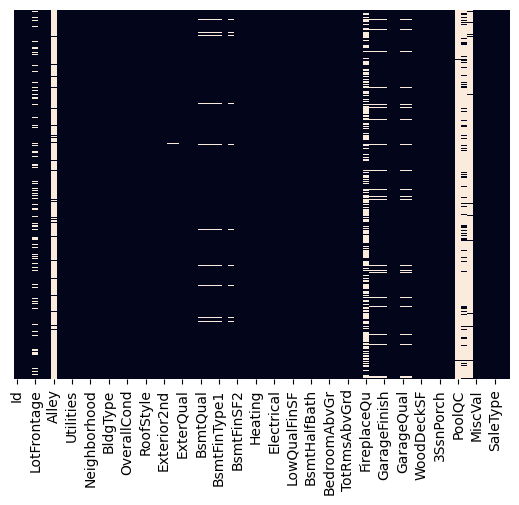

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [10]:
test.drop(['Alley'],axis=1,inplace=True)
test.drop(['GarageYrBlt'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [12]:
train.drop(['Alley'],axis=1,inplace=True)
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
y_price = train["SalePrice"].copy()
y_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

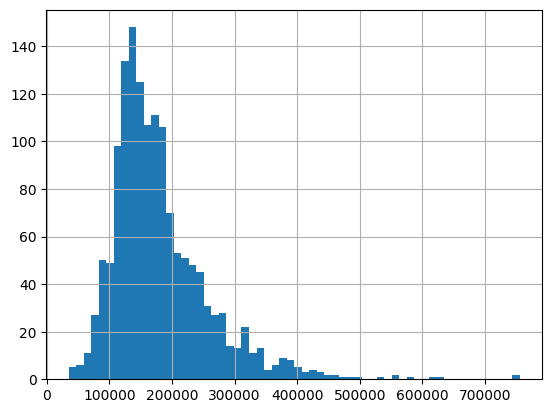

In [15]:
y_price.hist(bins=60)
#The destribution is shifted from the normal one, most prices are in the range of 100,000 to 200,000

C:\Users\maks_\AppData\Local\Temp\ipykernel_24468\667284934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


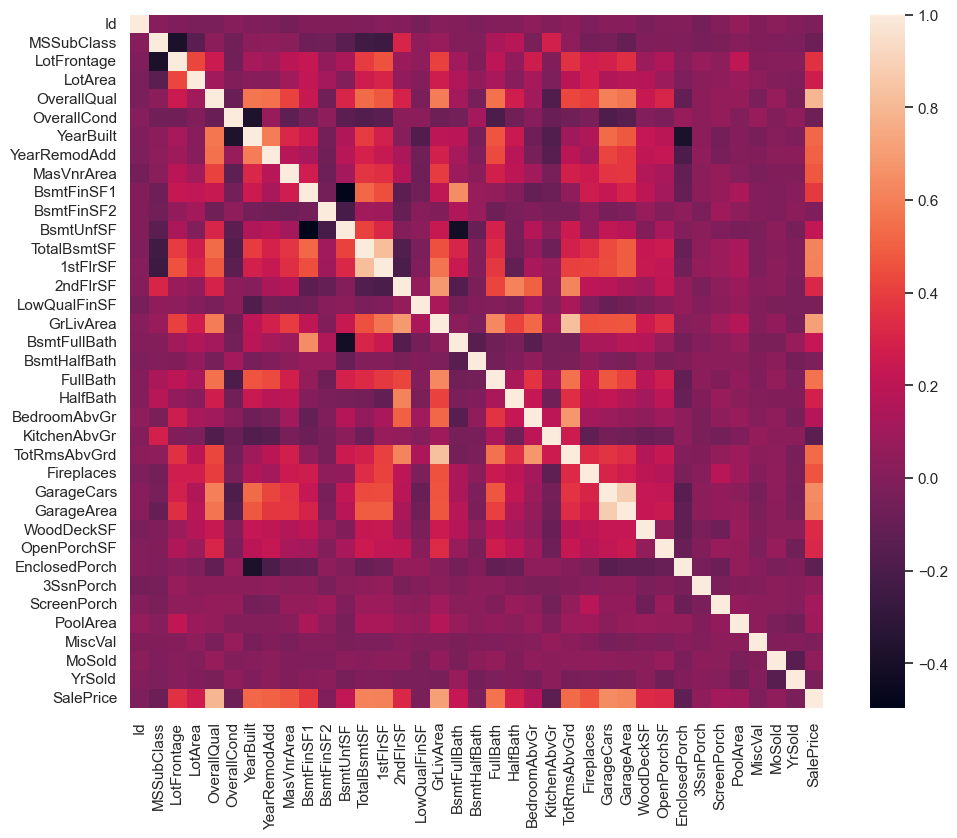

In [16]:
corrmat = train.corr()
sns.set(rc={"figure.figsize":(12,9)})
sns.heatmap(corrmat, square=True);

<Axes: >

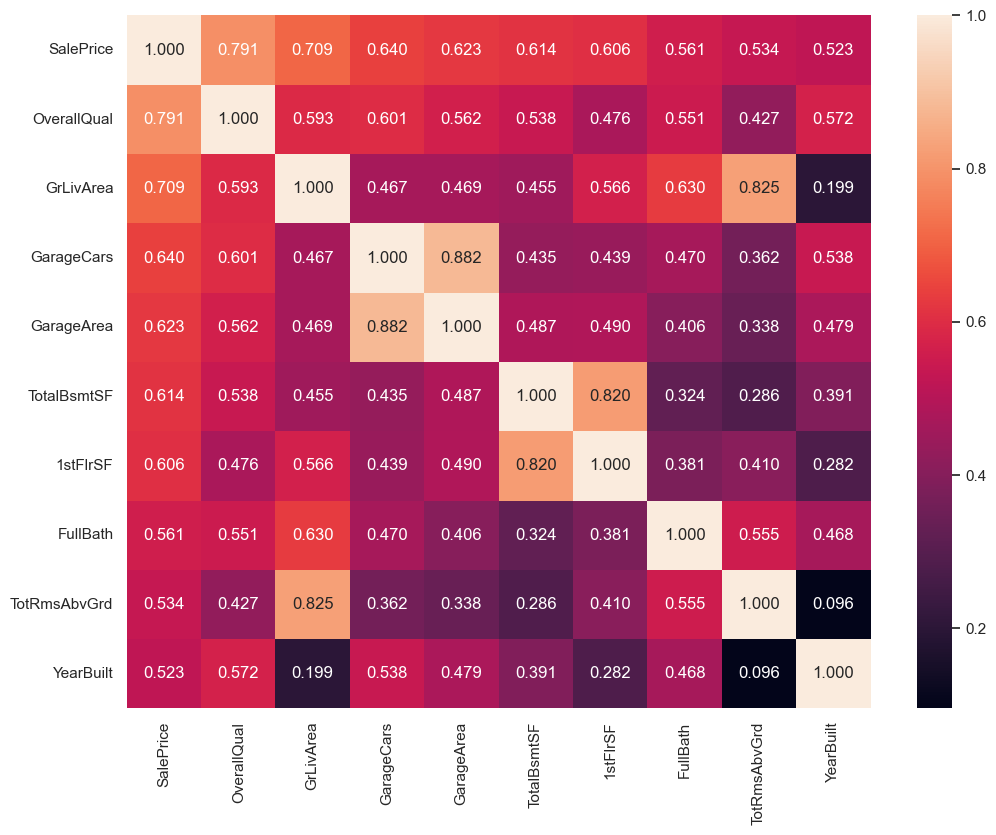

In [17]:
cols = corrmat.nlargest(10,"SalePrice")['SalePrice'].index
df_corr = train[cols].corr()
sns.heatmap(df_corr,annot=True,fmt='.3f')

<Axes: >

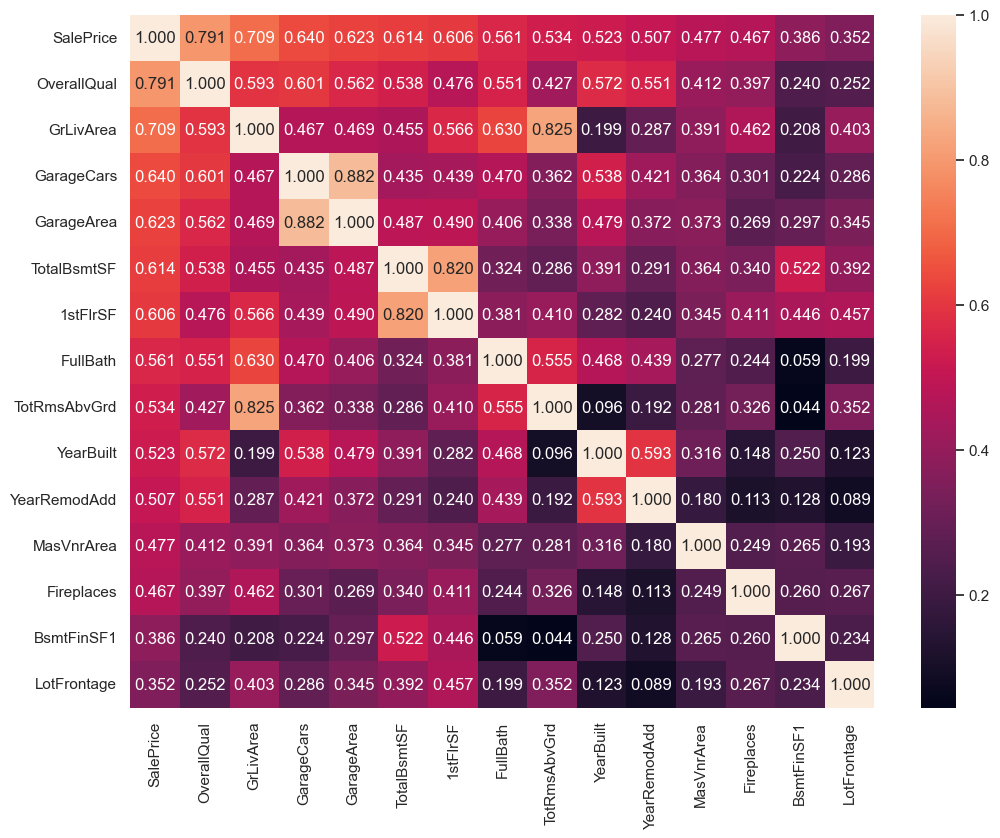

In [18]:
cols = corrmat.nlargest(15,"SalePrice")['SalePrice'].index
df_corr = train[cols].corr()
sns.heatmap(df_corr,annot=True,fmt='.3f')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

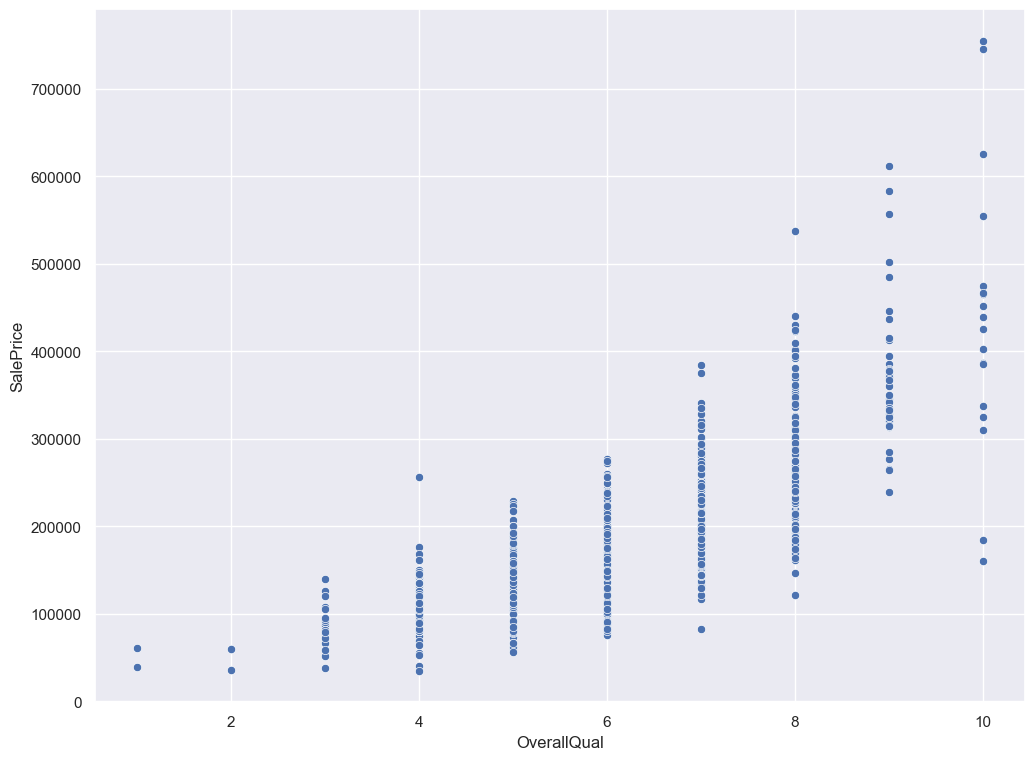

In [19]:
x = train["OverallQual"]
y = train["SalePrice"]

sns.scatterplot(x=x,y=y)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

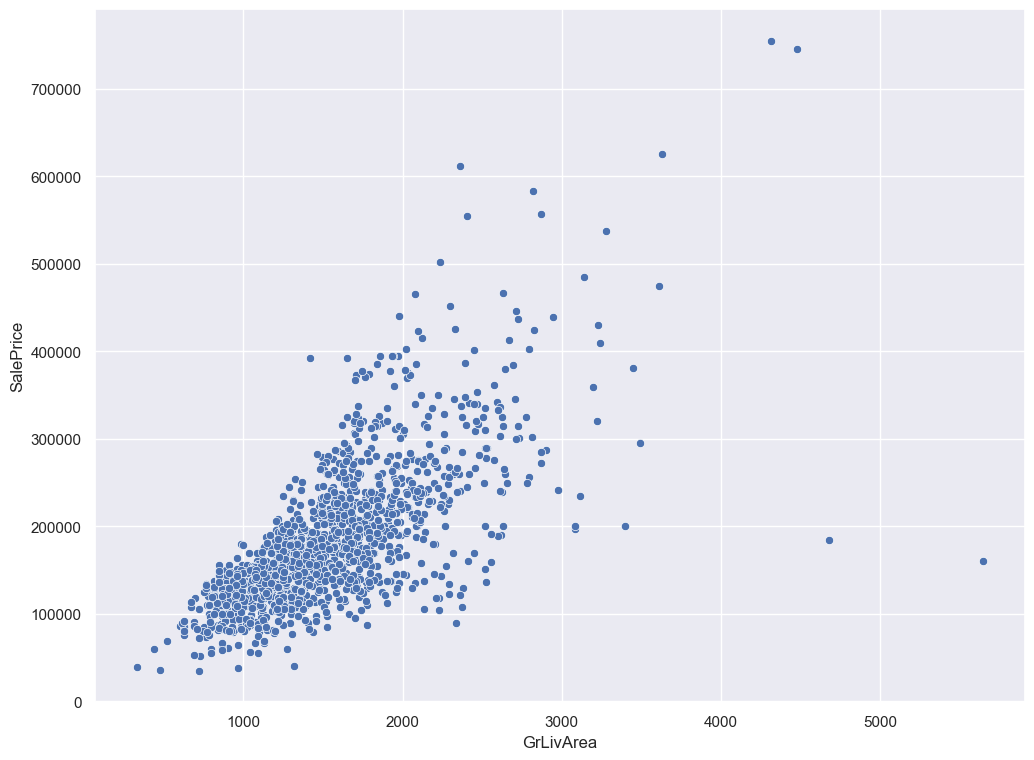

In [20]:
x = train["GrLivArea"]
y = train["SalePrice"]

sns.scatterplot(x=x,y=y)

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

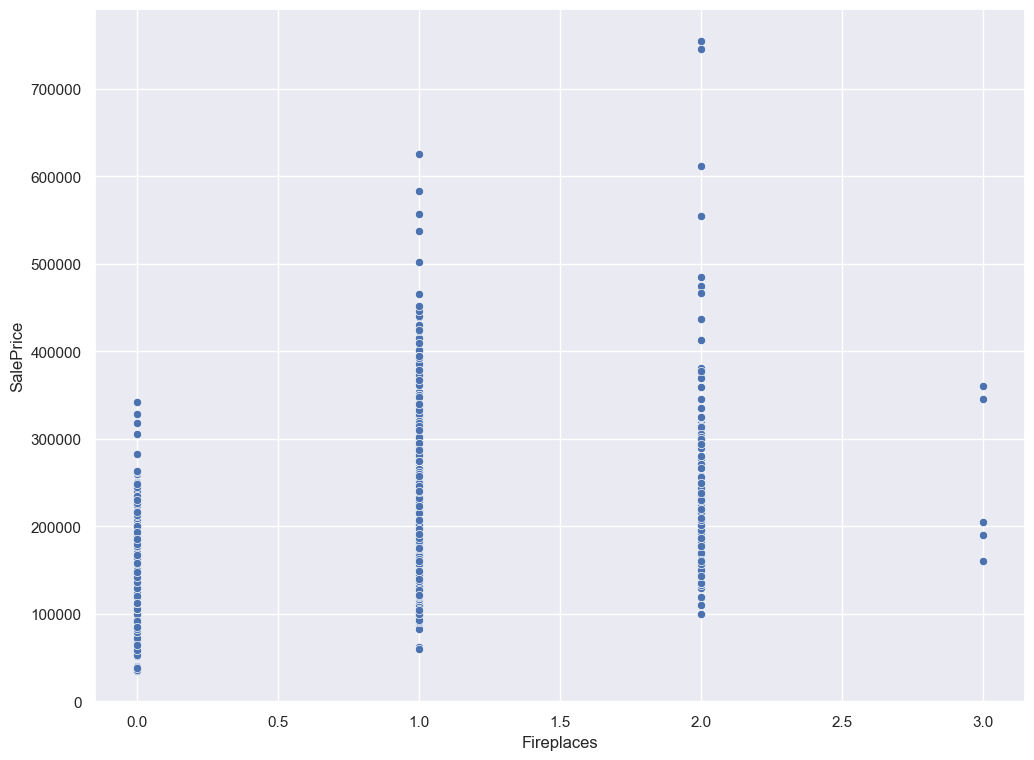

In [21]:
x = train["Fireplaces"]
y = train["SalePrice"]

sns.scatterplot(x=x,y=y)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

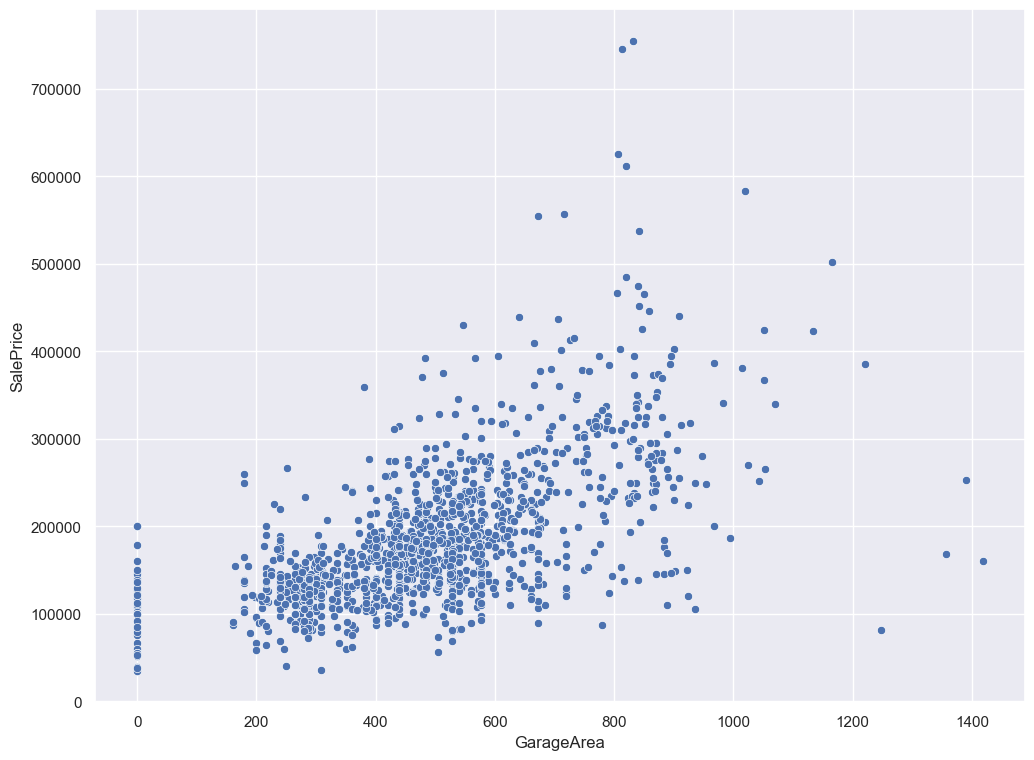

In [22]:
x = train["GarageArea"]
y = train["SalePrice"]

sns.scatterplot(x=x,y=y)

There are 1477 missing values

Columns with missing values:
 LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


<Axes: >

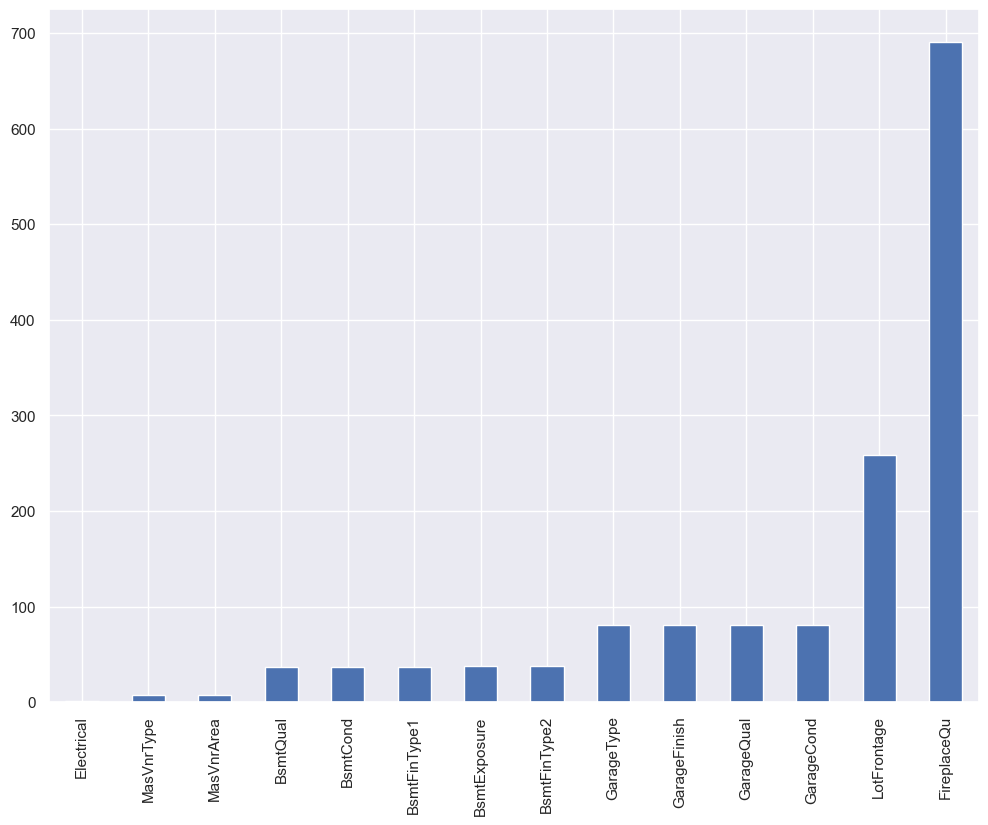

In [23]:
missing = train.isnull().sum()
print("There are", missing.sum(), "missing values")
print("\nColumns with missing values:\n", missing[missing > 0])
miss = missing[missing > 0]
miss.sort_values(inplace=True)
miss.plot.bar()

In [24]:
train = train.dropna(subset=['Electrical'])
train = train.drop(['FireplaceQu','LotFrontage','GarageType','GarageFinish','GarageQual','GarageCond',
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MasVnrArea'], axis=1)

In [25]:
test = test.dropna(subset=['Electrical'])
test = test.drop(['FireplaceQu','LotFrontage','GarageType','GarageFinish','GarageQual','GarageCond',
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MasVnrArea'], axis=1)

In [26]:
missing = train.isnull().sum()
print("There are", missing.sum(), "missing values")

There are 0 missing values


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

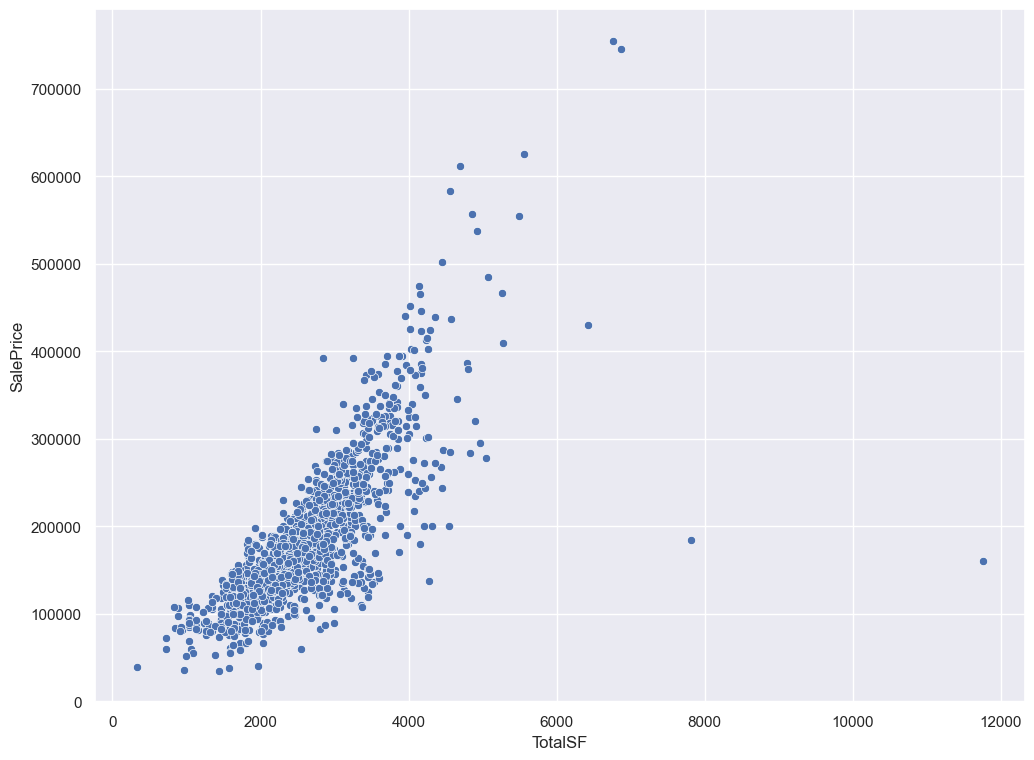

In [28]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] #total house size in sf
sns.scatterplot(x='TotalSF', y='SalePrice', data=train)
plt.show()

In [29]:
train.shape

(1459, 64)

In [30]:
test.shape

(1459, 62)

In [31]:
str(train.isnull().values.sum())

'0'

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
train.shape

(1459, 64)

In [51]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalSF'],
      dtype='object')

In [52]:
X = train[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'TotalSF']]
Y = train['SalePrice']

In [55]:
ord_encode = OrdinalEncoder()
train_new = ord_encode.fit_transform(X)

In [57]:
train_new

array([[  5.,   3., 327., ...,   8.,   4., 462.],
       [  0.,   3., 498., ...,   8.,   4., 443.],
       [  5.,   3., 701., ...,   8.,   4., 526.],
       ...,
       [  6.,   3., 415., ...,   8.,   4., 812.],
       [  0.,   3., 505., ...,   8.,   4., 276.],
       [  0.,   3., 531., ...,   8.,   4., 437.]])

In [59]:
pd.DataFrame(train_new, columns=[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'TotalSF']])

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,5.0,3.0,327.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,462.0
1,0.0,3.0,498.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,443.0
2,5.0,3.0,701.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,526.0
3,6.0,3.0,489.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,...,108.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,416.0
4,5.0,3.0,924.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.0,3.0,267.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0,480.0
1455,0.0,3.0,865.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,8.0,4.0,840.0
1456,6.0,3.0,415.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,...,0.0,0.0,0.0,0.0,17.0,4.0,4.0,8.0,4.0,812.0
1457,0.0,3.0,505.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,...,38.0,0.0,0.0,0.0,0.0,3.0,4.0,8.0,4.0,276.0


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split( train_new, Y, train_size=0.7, shuffle=True,
                                                     random_state=20)

In [62]:
print("X (train, test) samples: ",X_train.shape, X_test.shape)
print("Y (train, test) samples: ",Y_train.shape, Y_test.shape)

X (train, test) samples:  (1021, 62) (438, 62)
Y (train, test) samples:  (1021,) (438,)


In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, Y_train.values.reshape(-1, 1))

LinearRegression()

In [66]:
model.intercept_

array([26193.87117551])

In [69]:
model.coef_

array([[ 4.57568166e+02,  1.32842805e+02,  1.61328026e+01,
         2.57920176e+04, -4.73882981e+02,  1.06043741e+03,
        -1.44854084e-09, -3.49908640e+02,  9.06689063e+03,
         2.45511334e+02, -1.42030245e+02, -1.19416028e+03,
        -3.17229159e+03, -1.89271016e+03,  1.14643319e+04,
         4.26308464e+03,  1.08411976e+02,  4.98593340e+01,
         2.82757802e+03,  1.86191354e+03, -7.91841985e+02,
         1.69896076e+02, -1.16088552e+04,  1.71832772e+03,
         8.16608446e+02, -9.55369014e-02, -1.41974682e+02,
        -4.07666835e+01,  1.73923708e+02, -2.00485084e+03,
        -1.42517452e+03,  4.99053657e+03, -9.35829003e+02,
         3.34474587e+01,  1.41122506e+02, -6.27769511e+02,
         7.94655996e+01,  1.96475033e+03,  1.35187749e+03,
         8.69283557e+03,  4.67363586e+03, -9.33558877e+03,
        -2.48798338e+04, -1.00729435e+04,  6.55871301e+03,
         3.63898304e+03,  2.78116485e+03,  4.47359812e+03,
         3.40886977e+01,  1.39991221e+03,  1.93083647e+0

In [71]:
Y_pred = model.predict(X_test)

In [73]:
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared: ", r2_score(Y_test, Y_pred))

print("Model Score: ", model.score(X_test, Y_test.values.reshape(-1, 1)), '%')

Mean Absolute Error: 21185.727595371958
Mean Squared Error:  1261128535.4634254
RMSE:  35512.37158320218
R-squared:  0.8125172455744003
Model Score:  0.8125172455744003 %
